In [1]:
"""
seaborn系列 (18) | 线性回归图regplot() 原创
脑机接口社区2022-01-24 18:15:23博主文章分类：数据分析与可视化

线性回归图
利用线性回归模型对数据进行拟合。

函数原型
登录后复制 
seaborn.regplot(x, y, data=None,x_estimator=None, 
                x_bins=None,x_ci='ci', scatter=True,
                fit_reg=True, ci=95, n_boot=1000,
                units=None, order=1, logistic=False,
                lowess=False, robust=False, logx=False,
                x_partial=None, y_partial=None,
                truncate=False, dropna=True,
                x_jitter=None, y_jitter=None, label=None,
                color=None, marker='o', scatter_kws=None,
                line_kws=None, ax=None)
-----------------------------------
©著作权归作者所有：来自51CTO博客作者脑机接口社区的原创作品，请联系作者获取转载授权，否则将追究法律责任
seaborn系列 (18) | 线性回归图regplot()
https://blog.51cto.com/u_6811786/4967853
"""
import seaborn as sns
import matplotlib.pyplot as plt
# 设置风格样式
sns.set(color_codes=True)
# 构建数据
tips = sns.load_dataset("tips", data_home='./seaborn-data', cache=True)

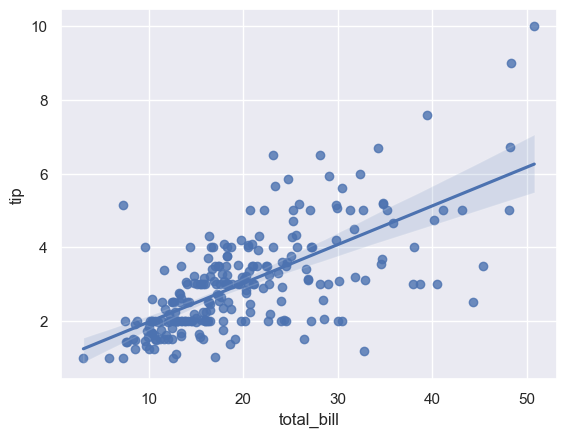

In [2]:
"""
案例1：
绘制双变量的线性关系
"""
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

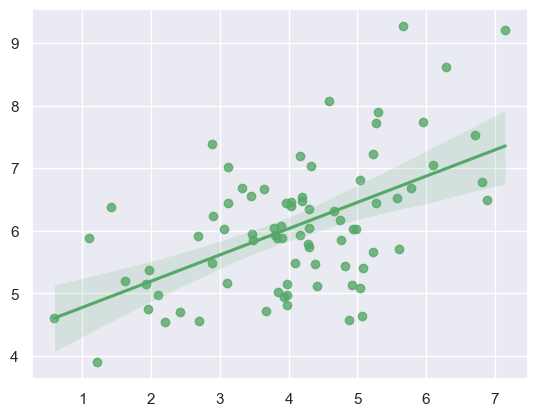

In [4]:
"""
案例2：
构建随机数据，绘制双变量的线性关系
"""
import numpy as np
# 构建数据
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T

sns.regplot(x=x, y=y, color="g")
plt.show()

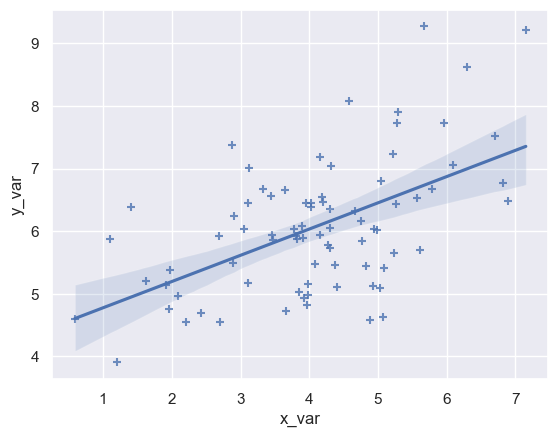

In [6]:
"""
案例3：
构建随机数据，并对数据Series，并指定x,y对应的变量名，绘制双变量的线性关系
"""
import pandas as pd
# 构建数据
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")

sns.regplot(x=x, y=y, marker="+")
plt.show()

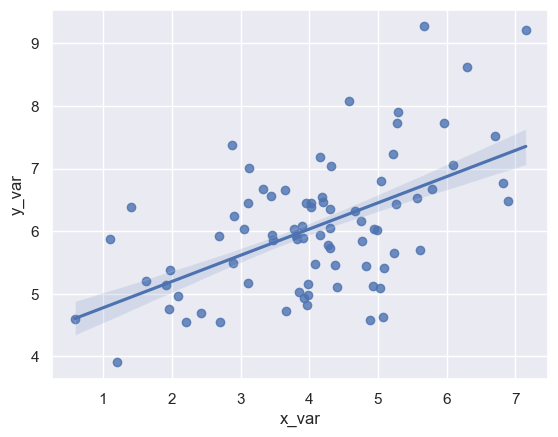

In [7]:
"""
案例4：
参考案例3，并设置ci=68:使用68%的置信区间，该区间对应于估计的标准误差
"""
# 构建数据
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")

sns.regplot(x=x, y=y, ci=68)
plt.show()

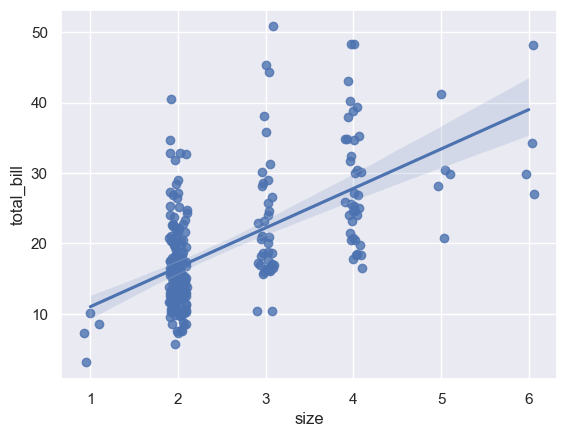

In [8]:
"""
案例5：
根据数据的实际情况，指定按x轴进行分组，
并对x轴分组数据增加一些抖动(x_jitter=.1)
"""
sns.regplot(x="size", y="total_bill", 
            data=tips, x_jitter=.1)
plt.show()

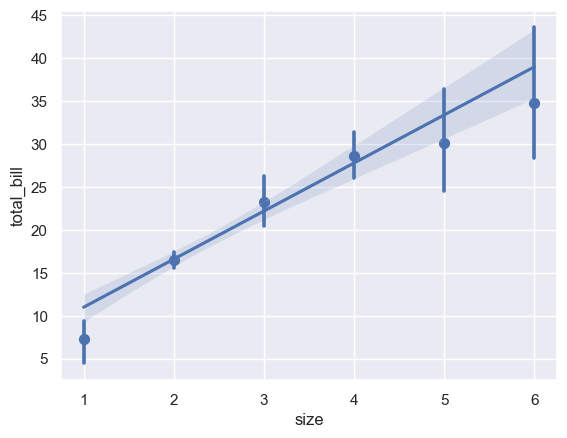

In [9]:
"""
案例6：
根据数据的实际情况，指定按x轴进行分组，只显示每一分组数据的均值和置信区间
"""
sns.regplot(x="size", y="total_bill", 
            data=tips,x_estimator=np.mean)
plt.show()

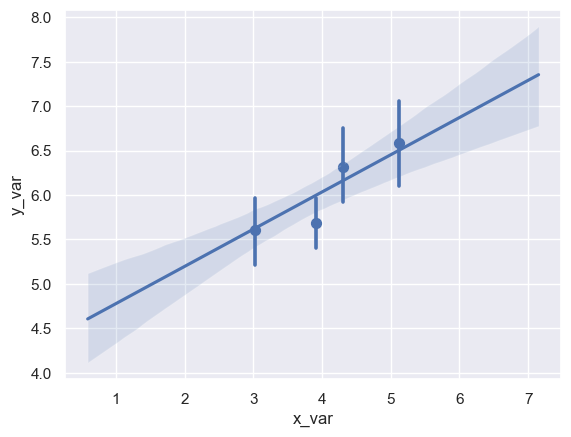

In [10]:
"""
案例7：
将连续变量绘制成不连续的区域
"""
# 构建数据
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")

sns.regplot(x=x, y=y, x_bins=4)
plt.show()

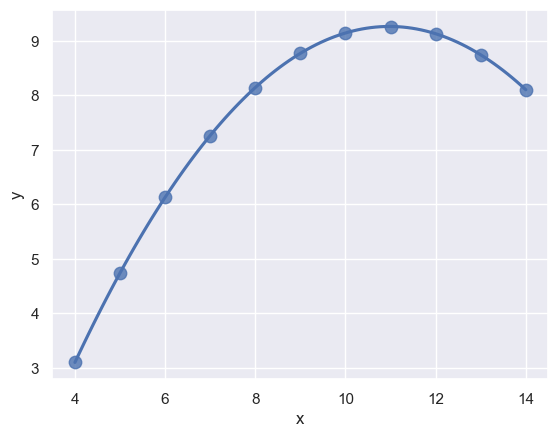

In [12]:
"""
案例8：
拟合高阶多项式回归并阶段模型预测
"""
# 构建数据
ans = sns.load_dataset("anscombe", data_home='./seaborn-data', cache=True)

sns.regplot(x="x", y="y",
            data=ans.loc[ans.dataset == "II"],
            scatter_kws={"s": 80},
            order=2, ci=None, truncate=True)
plt.show()

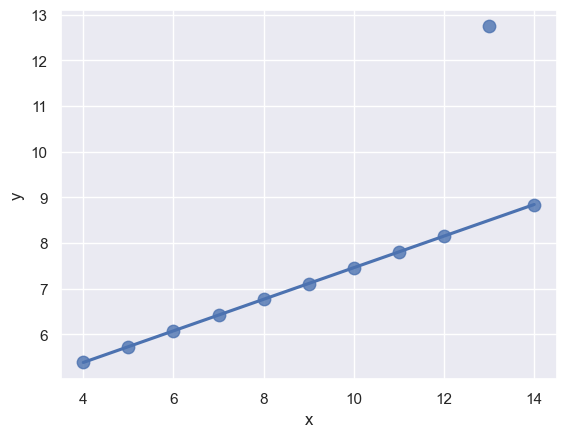

In [14]:
"""
案例9：
拟合稳健回归，不要置信区间
"""
# 构建数据
ans = sns.load_dataset("anscombe", data_home='./seaborn-data', cache=True)

sns.regplot(x="x", y="y", 
            data=ans.loc[ans.dataset == "III"],
            scatter_kws={"s": 80},
            robust=True, ci=None)
plt.show()

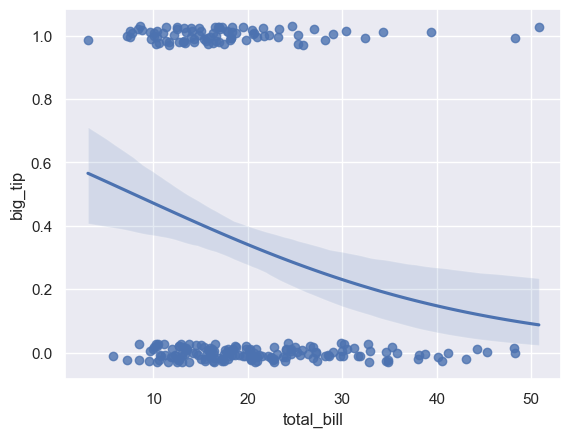

In [15]:
"""
案例10：
拟合logistic 回归(logistic=True)，
对y轴数据进行抖动(y_jitter=.03)，
并进行适当的迭代(n_boot=500)
"""
# 构建数据
tips = sns.load_dataset("tips", data_home='./seaborn-data', cache=True)
tips["big_tip"] = (tips.tip / tips.total_bill) > .175

sns.regplot(x="total_bill", y="big_tip", 
            data=tips,logistic=True, 
            n_boot=500, y_jitter=.03)
plt.show()

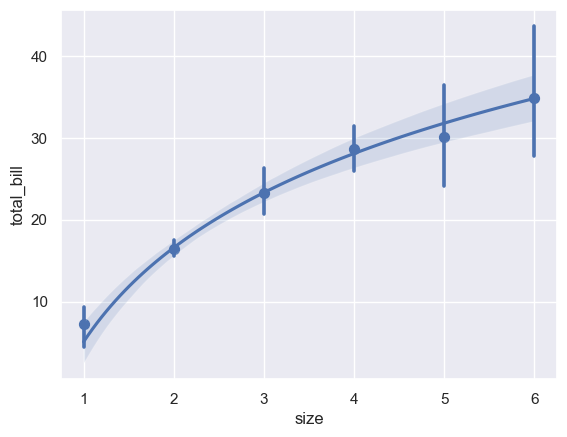

In [16]:
"""
案例11：
使用log(x)拟合回归模型，并阶段模型预测
"""
sns.regplot(x="size", y="total_bill", 
            data=tips,x_estimator=np.mean, 
            logx=True, truncate=True)
plt.show()